# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import time
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint
from citipy import citipy
from api_keys import weather_api_key

city_df = "output_data/cities.csv"

lat_range = (-90, 90)
lng_range = (-180,180)


## Generate Cities List

In [2]:
#list for holding lat and cities
lat = []
cities = []

#create 500 unique (non-repeat) cities based on latitude and longitude.
lats = np.random.uniform(low =-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low =-180.000, high=180.000, size=1500)
lat = zip(lats,lngs)

for latitude in lat:
    city = citipy.nearest_city(latitude[0],latitude[1]).city_name

    if city not in cities:
        cities.append(city)
        
len(cities)

598

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Build query URL

url = "http://api.openweathermap.org/data/2.5/weather?"

city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []

i = 1
for city in cities:
    city=city
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()

    try:
        
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        print(f"processing record{i}|{city}") 
        i+=1
        
  
    except(KeyError):
        print("City not found.")

print("-----------------------------")
print("Data Retrieval Complete")   

processing record1|puerto lopez
processing record2|henties bay
processing record3|albany
processing record4|aklavik
City not found.
processing record5|bredasdorp
processing record6|severo-kurilsk
processing record7|hobart
processing record8|opoczno
processing record9|cabo san lucas
processing record10|norman wells
processing record11|kemi
processing record12|kailua
processing record13|yellowknife
processing record14|georgetown
processing record15|busselton
processing record16|kapaa
processing record17|tiarei
processing record18|geraldton
processing record19|new norfolk
processing record20|king city
processing record21|manuk mangkaw
City not found.
processing record22|astrea
processing record23|sheregesh
processing record24|palmer
City not found.
processing record25|sistranda
processing record26|tiksi
processing record27|mataura
processing record28|kaka
processing record29|rocha
processing record30|cherskiy
City not found.
processing record31|ushuaia
processing record32|half moon bay
pr

processing record258|chau doc
City not found.
processing record259|ridgecrest
processing record260|dharchula
processing record261|farafangana
City not found.
processing record262|bafra
processing record263|frankfort
processing record264|pisco
processing record265|buta
processing record266|ahipara
City not found.
processing record267|navolato
processing record268|carbondale
processing record269|okhotsk
processing record270|faya
processing record271|carballo
processing record272|lingao
processing record273|kodiak
processing record274|constitucion
processing record275|kutum
processing record276|nanortalik
processing record277|kassala
processing record278|ondjiva
City not found.
processing record279|chabahar
processing record280|batsfjord
City not found.
processing record281|karratha
processing record282|necochea
processing record283|hualmay
processing record284|pierre
processing record285|santa ana
processing record286|labuhan
processing record287|ganzhou
processing record288|asau
process

processing record515|san angelo
processing record516|kashi
City not found.
City not found.
processing record517|enkhuizen
processing record518|pangoa
processing record519|cockburn town
City not found.
processing record520|khorixas
processing record521|maniitsoq
processing record522|guaimaro
processing record523|ibitinga
processing record524|xuddur
processing record525|swan hill
processing record526|senneterre
processing record527|sale
processing record528|broome
City not found.
processing record529|iranshahr
processing record530|ngunguru
processing record531|chara
processing record532|camacha
processing record533|buchanan
processing record534|vestmannaeyjar
processing record535|san javier
processing record536|maloy
processing record537|tuatapere
-----------------------------
Data Retrieval Complete


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:

city_df = pd.DataFrame({"City":city_name_list, 
                        "Country":country_list,
                        "Date":date_list, 
                        "Lat":lat_list,
                        "Lng":lng_list,
                        "Max Temp":max_temp_list,
                        "Cloudiness":cloudiness_list, 
                        "Humidity":humidity_list,
                        "Wind Speed":wind_speed_list})
city_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Cloudiness,Humidity,Wind Speed
0,Puerto López,CO,1631757072,4.0845,-72.9560,294.62,96,96,1.26
1,Henties Bay,NA,1631757073,-22.1160,14.2845,282.51,2,90,5.05
2,Albany,US,1631757075,42.6001,-73.9662,292.74,100,94,0.72
3,Aklavik,CA,1631757076,68.2191,-135.0107,287.61,56,65,2.00
4,Bredasdorp,ZA,1631757077,-34.5322,20.0403,281.77,70,93,1.03


In [5]:
city_df = city_df.dropna()
city_df.to_csv("../output_data/cities_data.csv", index= False, header = True)
city_df

,City,Country,Date,Lat,Lng,Max Temp,Cloudiness,Humidity,Wind Speed
0,Puerto López,CO,1631757072,4.0845,-72.9560,294.62,96,96,1.26
1,Henties Bay,NA,1631757073,-22.1160,14.2845,282.51,2,90,5.05
2,Albany,US,1631757075,42.6001,-73.9662,292.74,100,94,0.72
3,Aklavik,CA,1631757076,68.2191,-135.0107,287.61,56,65,2.00
4,Bredasdorp,ZA,1631757077,-34.5322,20.0403,281.77,70,93,1.03
...,...,...,...,...,...,...,...,...,...
532,Buchanan,LR,1631757650,5.8808,-10.0467,297.07,100,91,2.77
533,Vestmannaeyjar,IS,1631757652,63.4427,-20.2734,285.29,100,94,13.66
534,San Javier,ES,1631757653,37.8063,-0.8374,296.62,0,87,1.03
535,Måløy,NO,1631757654,61.9353,5.1136,285.41,100,92,1.79


In [6]:
city_df = pd.read_csv("../output_data/cities_data.csv")
city_df

,City,Country,Date,Lat,Lng,Max Temp,Cloudiness,Humidity,Wind Speed
0,Puerto López,CO,1631757072,4.0845,-72.9560,294.62,96,96,1.26
1,Henties Bay,NaN,1631757073,-22.1160,14.2845,282.51,2,90,5.05
2,Albany,US,1631757075,42.6001,-73.9662,292.74,100,94,0.72
3,Aklavik,CA,1631757076,68.2191,-135.0107,287.61,56,65,2.00
4,Bredasdorp,ZA,1631757077,-34.5322,20.0403,281.77,70,93,1.03
...,...,...,...,...,...,...,...,...,...
532,Buchanan,LR,1631757650,5.8808,-10.0467,297.07,100,91,2.77
533,Vestmannaeyjar,IS,1631757652,63.4427,-20.2734,285.29,100,94,13.66
534,San Javier,ES,1631757653,37.8063,-0.8374,296.62,0,87,1.03
535,Måløy,NO,1631757654,61.9353,5.1136,285.41,100,92,1.79


In [7]:
city_df.count()

City          537
Country       533
Date          537
Lat           537
Lng           537
Max Temp      537
Cloudiness    537
Humidity      537
Wind Speed    537
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.
indices = city_df[city_df["Humidity"]>100].index
indices

Int64Index([], dtype='int64')

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_df.drop(indices)
clean_city_data

,City,Country,Date,Lat,Lng,Max Temp,Cloudiness,Humidity,Wind Speed
0,Puerto López,CO,1631757072,4.0845,-72.9560,294.62,96,96,1.26
1,Henties Bay,NaN,1631757073,-22.1160,14.2845,282.51,2,90,5.05
2,Albany,US,1631757075,42.6001,-73.9662,292.74,100,94,0.72
3,Aklavik,CA,1631757076,68.2191,-135.0107,287.61,56,65,2.00
4,Bredasdorp,ZA,1631757077,-34.5322,20.0403,281.77,70,93,1.03
...,...,...,...,...,...,...,...,...,...
532,Buchanan,LR,1631757650,5.8808,-10.0467,297.07,100,91,2.77
533,Vestmannaeyjar,IS,1631757652,63.4427,-20.2734,285.29,100,94,13.66
534,San Javier,ES,1631757653,37.8063,-0.8374,296.62,0,87,1.03
535,Måløy,NO,1631757654,61.9353,5.1136,285.41,100,92,1.79


In [10]:
indices_more = city_df[city_df["Humidity"]<100].index
indices_more

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            527, 528, 529, 530, 531, 532, 533, 534, 535, 536],
           dtype='int64', length=530)

In [11]:
clean_city_data = city_df.drop(indices_more)
clean_city_data

,City,Country,Date,Lat,Lng,Max Temp,Cloudiness,Humidity,Wind Speed
10,Keminmaa,FI,1631757085,65.8596,24.8228,275.02,90,100,0.51
30,Ushuaia,AR,1631756900,-54.8000,-68.3000,270.96,75,100,7.72
40,Kiryat Gat,IL,1631757118,31.6100,34.7642,296.15,9,100,1.41
84,Hambantota,LK,1631757173,6.1241,81.1185,299.34,20,100,2.57
234,Grindavik,IS,1631757215,63.8424,-22.4338,286.12,90,100,7.72
264,Buta,CD,1631757387,2.7858,24.7300,293.96,100,100,0.23
371,Isangel,VU,1631757496,-19.5500,169.2667,300.21,75,100,0.00


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

# Latitude vs. Temperature Plot

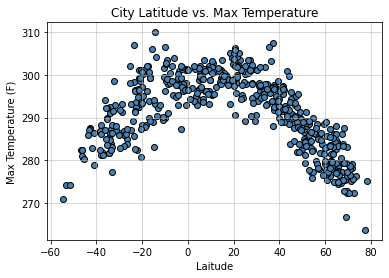

In [12]:
plt.scatter(city_df["Lat"], city_df["Max Temp"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Laitude")
plt.ylabel("Max Temperature (F)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.savefig("F:\Miley\Data Analyst\week 6\python-api-challenge\WeatherPy\output_data\lat_vs_temp.png")
plt.show()

The hight temperatuer is found between -20 to 20 latitude in northen hemisphere and southern hemispherre.

# Latitude vs. Humidity(%) Plot

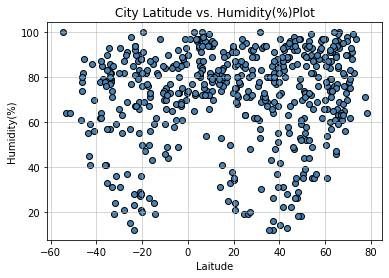

In [13]:
plt.scatter(city_df["Lat"], city_df["Humidity"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Humidity(%)Plot")
plt.xlabel("Laitude")
plt.ylabel("Humidity(%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.savefig("F:\Miley\Data Analyst\week 6\python-api-challenge\WeatherPy\output_data\lat_vs_hum.png")
plt.show()

As the scatter plot figure, high humidity is more likely in northern hemisphere 

## Latitude vs. Cloudiness Plot

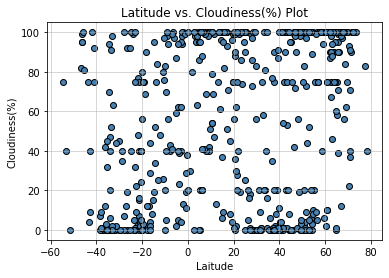

In [14]:
plt.scatter(city_df["Lat"], city_df["Cloudiness"], facecolor = "steelblue", edgecolor = "black")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.title("City Latitude vs. Cloudiness(%)Plot")
plt.xlabel("Laitude")
plt.ylabel("Cloudiness(%)")
plt.title ("Latitude vs. Cloudiness(%) Plot")
plt.savefig("F:\Miley\Data Analyst\week 6\python-api-challenge\WeatherPy\output_data\lat_vs_clou.png")
plt.show()

As the scatter plot figure above, cloudniess is widely spread across latitude

## Latitude vs. Wind Speed Plot

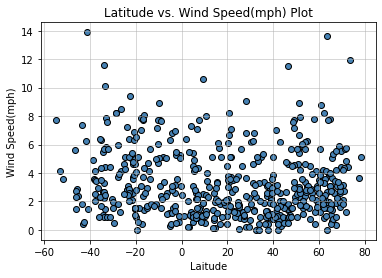

In [15]:
plt.scatter(city_df["Lat"], city_df["Wind Speed"], facecolor = "steelblue", edgecolor = "black")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.title("City Latitude vs. Wind Speed(%)Plot")
plt.xlabel("Laitude")
plt.ylabel("Wind Speed(mph)")
plt.title ("Latitude vs. Wind Speed(mph) Plot")
plt.savefig("F:\Miley\Data Analyst\week 6\python-api-challenge\WeatherPy\output_data\lat_vs_wind.png")
plt.show()

As the scatter plot figure above, wind speed is widely spread across the latitude

## Linear Regression

# Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [22]:
northern_hemisphere = city_df.loc[city_df["Lat"] >= 0]
southern_hemisphere = city_df.loc[city_df["Lat"] < 0]
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(15,20),fontsize=15,color="red")

The r-squared is : -0.85


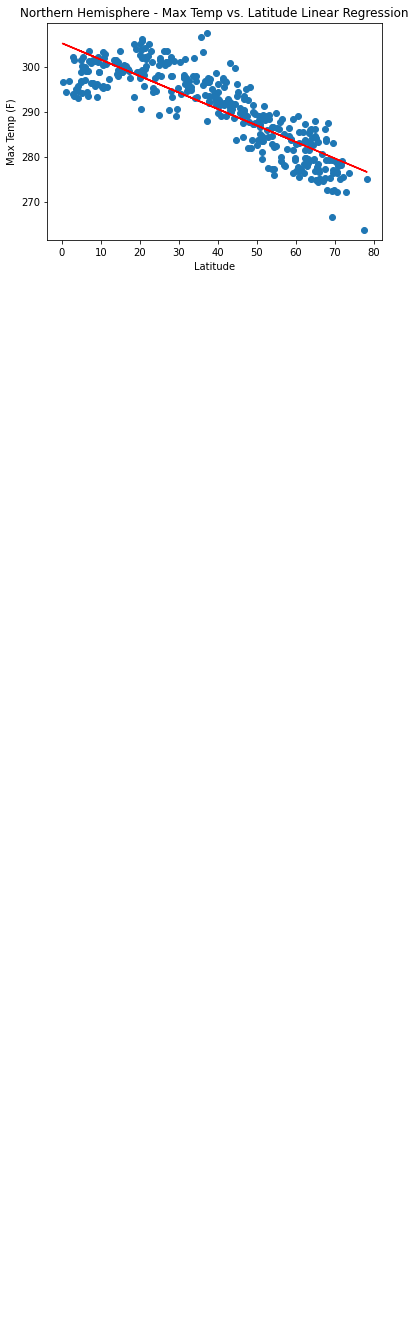

In [26]:
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])
annotate(equation, 0, 0)
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.savefig("F:\Miley\Data Analyst\week 6\python-api-challenge\WeatherPy\output_data\Temp in north.png")
plt.show()

Temperature is negatively correlated with latitude and the higher latitude, the lower the maximum temp.

## Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.73


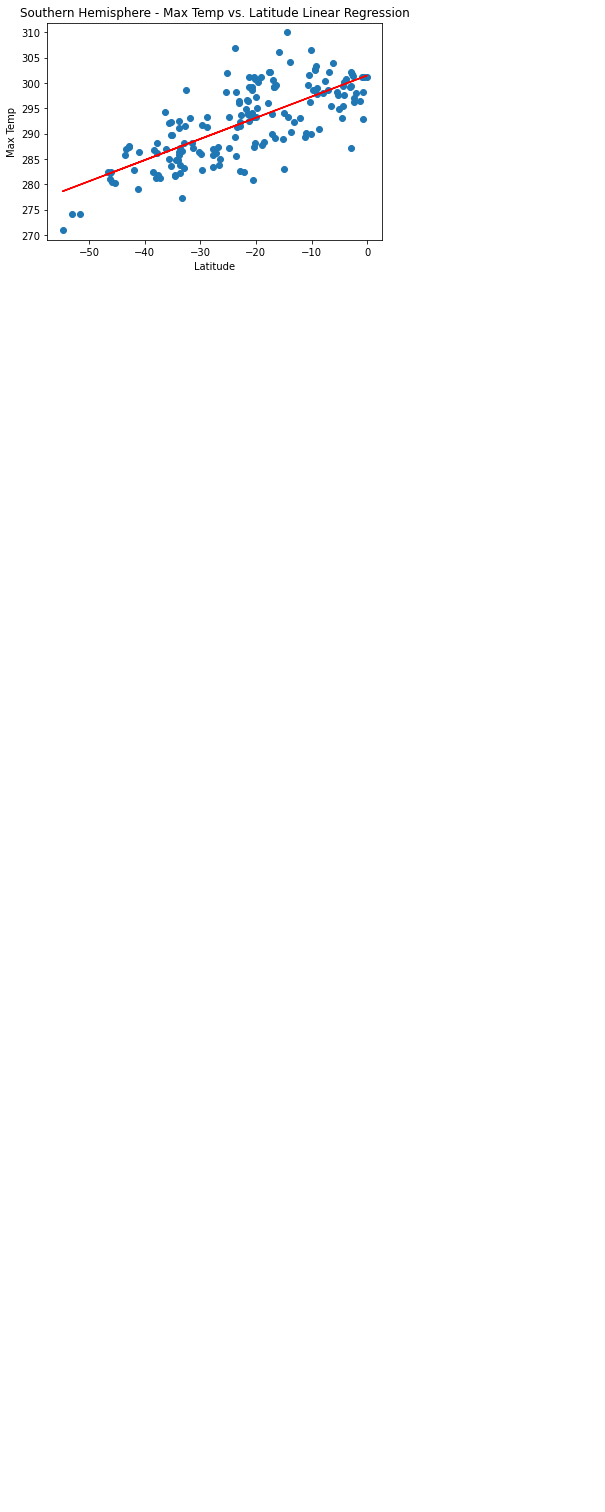

In [27]:
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Max Temp"])
annotate(equation, 0, 0)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title ("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.savefig("F:\Miley\Data Analyst\week 6\python-api-challenge\WeatherPy\output_data\south_Temp.png")
plt.show()

Temperature is positively correlated with latitude and the lower in latitude, the lower the maximum temp.

#  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : -0.05


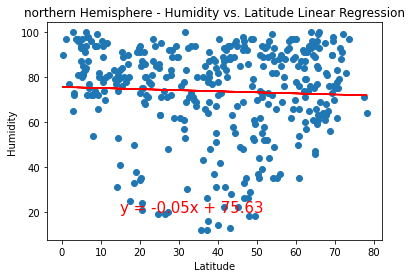

In [28]:
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])
annotate(equation, 0, 0)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title ("northern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.savefig("F:\Miley\Data Analyst\week 6\python-api-challenge\WeatherPy\output_data\humdity in north.png")
plt.show()

Humidity is positively correlated with latitude and the higher the latitude, the higher the humidity.

#  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.08


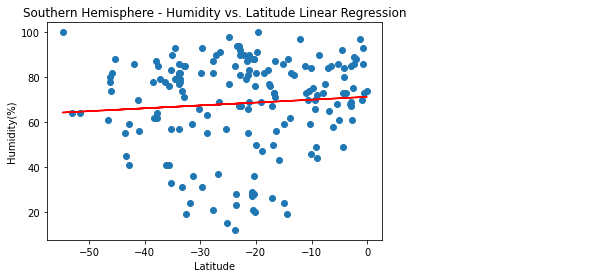

In [32]:
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])
annotate(equation, 0, 0)
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title ("Southern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.savefig("F:\Miley\Data Analyst\week 6\python-api-challenge\WeatherPy\output_data\south_hum.png")
plt.show()


Humidity is somehow negatively correlated with latitude and the lower the latitude, the higher the humidity.

# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.06


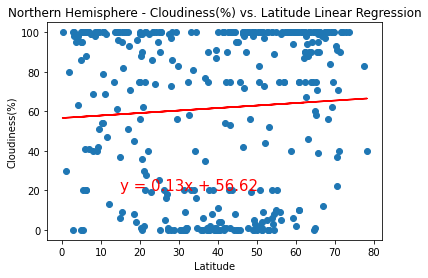

In [33]:
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])
annotate(equation, 0, 0)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title ("Northern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression")
plt.savefig("F:\Miley\Data Analyst\week 6\python-api-challenge\WeatherPy\output_data\cloud in north.png")
plt.show()

Cloudiness is some positively correlated with latitude howerve, the higher the latitude, the higher the cloudiness.

#  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.13


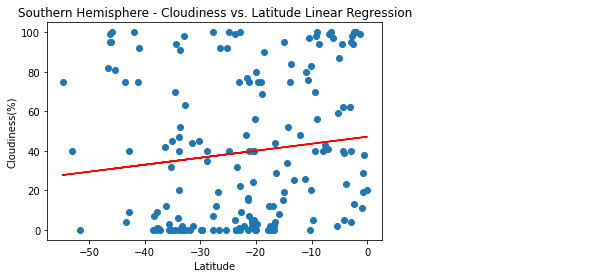

In [34]:
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])
annotate(equation, 0, 0)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title ("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.savefig("F:\Miley\Data Analyst\week 6\python-api-challenge\WeatherPy\output_data\south_clo.png")
plt.show()

Cloudiness is positively correlated with latitude. As the lower between 0 to -40 latitude, the higher the cloudiness.

#  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.12


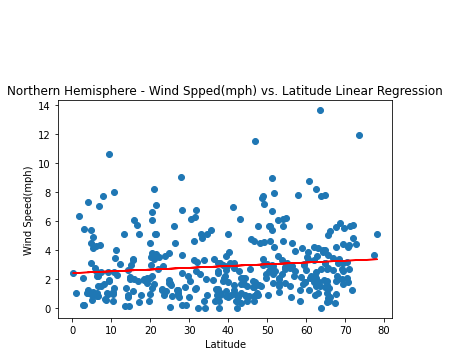

In [30]:
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])
annotate(equation, 0, 0)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title ("Northern Hemisphere - Wind Spped(mph) vs. Latitude Linear Regression")
plt.savefig("F:\Miley\Data Analyst\week 6\python-api-challenge\WeatherPy\output_data\wind_north.png")
plt.show()

As the figure above, there is a weak positive correlation between latitude and windspeed for northern hemisphere.

# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.08


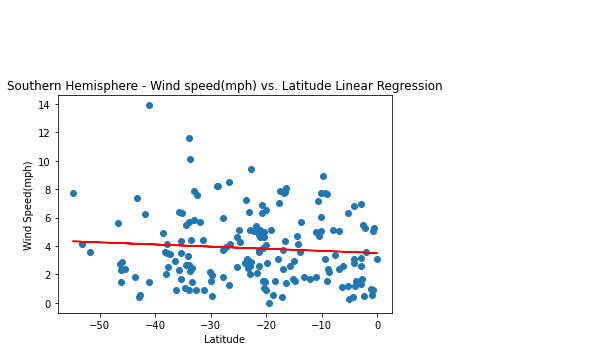

In [36]:
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])
annotate(equation, 0, 0)             
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title ("Southern Hemisphere - Wind speed(mph) vs. Latitude Linear Regression")
plt.savefig("F:\Miley\Data Analyst\week 6\python-api-challenge\WeatherPy\output_data\south_wind.png")
plt.show()

As the figure above, there is a weak negative correlation between latitude and wind speed for southern hemisphere.

# Observation 
As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.